In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start='2010-01-01'
df=yf.download('TSLA',start)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600
2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300
2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100
2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200
2023-04-28,160.899994,165.000000,157.320007,164.309998,164.309998,122351000


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


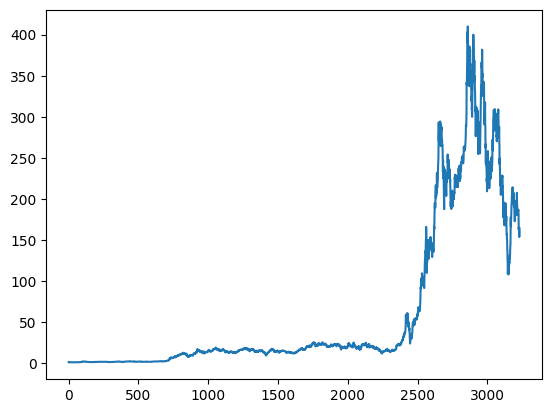

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3226    171.2681
3227    171.0665
3228    170.6570
3229    170.3119
3230    170.0064
Name: Close, Length: 3231, dtype: float64

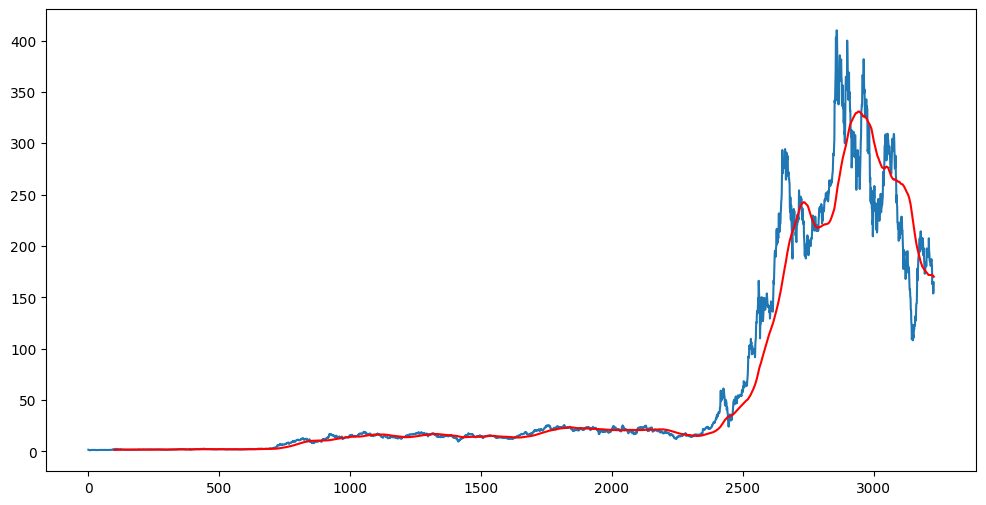

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3226    212.021017
3227    211.570550
3228    211.167584
3229    210.803184
3230    210.439534
Name: Close, Length: 3231, dtype: float64

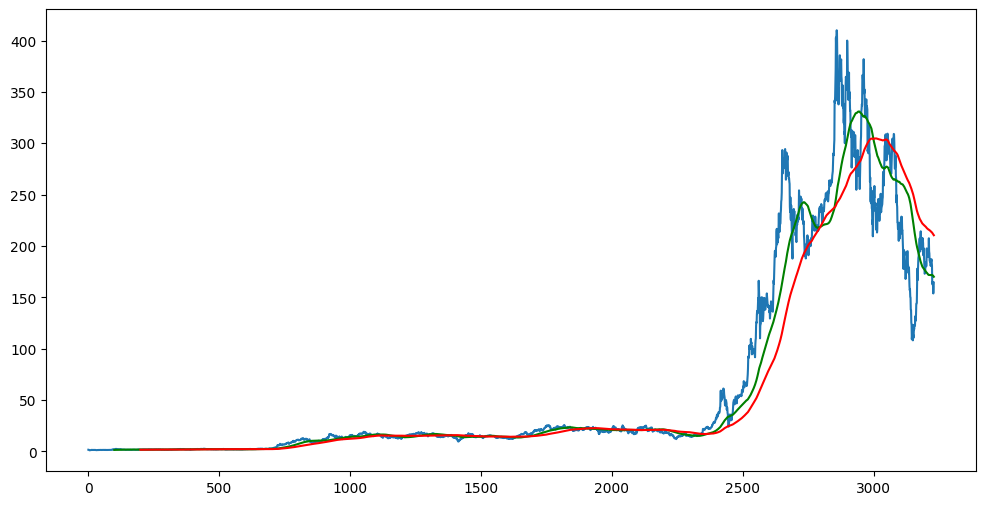

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g',label='MA 100')
plt.plot(ma200,'r',label='MA 200')

In [11]:
df.shape

(3231, 5)

In [12]:
#splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.shape

(2261, 1)

In [13]:
data_testing.shape

(970, 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=Scaler.fit_transform(data_training)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.57050376],
       [0.55205845],
       [0.55812565]])

In [16]:
data_training_array.shape

(2261, 1)

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(2161, 100, 1)

In [18]:
y_train.shape

(2161,)

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape= (100,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
68/68 [==============================] - 72s 652ms/step - loss: 0.0525
Epoch 2/50
68/68 [==============================] - 45s 660ms/step - loss: 0.0129
Epoch 3/50
68/68 [==============================] - 44s 647ms/step - loss: 0.0099
Epoch 4/50
68/68 [==============================] - 44s 642ms/step - loss: 0.0096
Epoch 5/50
68/68 [==============================] - 44s 641ms/step - loss: 0.0095
Epoch 6/50
68/68 [==============================] - 44s 644ms/step - loss: 0.0085
Epoch 7/50
68/68 [==============================] - 44s 640ms/step - loss: 0.0084
Epoch 8/50
68/68 [==============================] - 44s 640ms/step - loss: 0.0080
Epoch 9/50
68/68 [==============================] - 44s 643ms/step - loss: 0.0074
Epoch 10/50
68/68 [==============================] - 44s 641ms/step - loss: 0.0075
Epoch 11/50
68/68 [==============================] - 43s 637ms/step - loss: 0.0071
Epoch 12/50
68/68 [==============================] - 43s 634ms/step - loss: 0.0073
Epoch 13/50
6

In [25]:
 model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2261,14.909333
2262,14.650667
2263,14.618000
2264,14.856000
2265,14.897333


In [27]:
data_training.tail(100)

,Close
2161,20.584667
2162,20.468000
2163,20.813999
2164,20.859333
2165,21.423332
...,...
2256,15.002000
2257,14.982667
2258,15.095333
2259,14.641333


In [30]:
past_100_days = data_training.tail(100)

In [39]:
final_df=data_testing

In [40]:
final_df.head

<bound method NDFrame.head of            Close
2261   14.909333
2262   14.650667
2263   14.618000
2264   14.856000
2265   14.897333
...          ...
3226  162.550003
3227  160.669998
3228  153.750000
3229  160.190002
3230  164.309998

[970 rows x 1 columns]>

In [42]:
input_data=Scaler.fit_transform(final_df)
input_data

array([[2.06124799e-03],
       [1.40784742e-03],
       [1.32532889e-03],
       [1.92652602e-03],
       [2.03093530e-03],
       [2.65570950e-03],
       [2.21449531e-03],
       [3.95746133e-03],
       [3.65433690e-03],
       [3.18954564e-03],
       [3.14239151e-03],
       [4.63444137e-03],
       [4.58055162e-03],
       [5.67180098e-03],
       [7.08974941e-03],
       [6.90113770e-03],
       [7.31877964e-03],
       [7.09648503e-03],
       [7.87787435e-03],
       [7.45686942e-03],
       [8.21299777e-03],
       [9.00617201e-03],
       [2.93357536e-03],
       [2.80222120e-03],
       [4.10397303e-03],
       [5.19690629e-03],
       [5.08744048e-03],
       [3.78063935e-03],
       [3.86315788e-03],
       [2.84937052e-03],
       [3.25859053e-03],
       [3.70822425e-03],
       [4.53003208e-03],
       [3.97598427e-03],
       [2.96556954e-03],
       [3.97430278e-03],
       [1.38426795e-03],
       [7.14028340e-04],
       [1.43816010e-03],
       [2.59845194e-03],


In [43]:
input_data.shape

(970, 1)

In [46]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [47]:
x_test,y_test=np.array(x_test),np.array(y_test)


In [48]:
x_test.shape

(870, 100, 1)

In [50]:
y_test.shape

(870,)

In [51]:
y_predicted=model.predict(x_test)
y_predicted.shape

28/28 [==============================] - 9s 218ms/step


(870, 1)

In [52]:
y_test

array([0.02268552, 0.02323114, 0.02370604, 0.02333892, 0.0249438 ,
       0.02371446, 0.02415399, 0.0204845 , 0.02104022, 0.01979067,
       0.02018979, 0.01996245, 0.02079267, 0.02101665, 0.02048281,
       0.02003486, 0.02096444, 0.02157742, 0.02314526, 0.02379529,
       0.02497074, 0.0247535 , 0.02864528, 0.0282226 , 0.03060717,
       0.03244108, 0.0327021 , 0.03499743, 0.0360129 , 0.03697111,
       0.0368768 , 0.03423625, 0.03484755, 0.0368566 , 0.03900373,
       0.04044021, 0.04339062, 0.04727735, 0.0454586 , 0.0449214 ,
       0.05278748, 0.05498682, 0.05171644, 0.05087274, 0.05036922,
       0.0565496 , 0.06031509, 0.06075967, 0.05951685, 0.05837171,
       0.05986712, 0.06223992, 0.07231377, 0.07395738, 0.09575373,
       0.11378291, 0.08812509, 0.09052651, 0.09037663, 0.09428526,
       0.0948073 , 0.09361333, 0.09979539, 0.09912684, 0.10895649,
       0.11889561, 0.11586268, 0.11613044, 0.1048121 , 0.09910662,
       0.09555164, 0.07874506, 0.07689095, 0.08962725, 0.08994

In [53]:
y_predicted

array([[0.05590165],
       [0.05625787],
       [0.05657348],
       [0.05684689],
       [0.05707777],
       [0.05726713],
       [0.05741823],
       [0.05753332],
       [0.05761236],
       [0.05765057],
       [0.05764353],
       [0.05758691],
       [0.05747926],
       [0.05732295],
       [0.0571245 ],
       [0.05689308],
       [0.05663872],
       [0.05637151],
       [0.05610359],
       [0.05584773],
       [0.05561826],
       [0.05542856],
       [0.05529097],
       [0.05521652],
       [0.05521703],
       [0.05530107],
       [0.05547804],
       [0.05575544],
       [0.0561372 ],
       [0.05662587],
       [0.0572204 ],
       [0.05791458],
       [0.05868709],
       [0.05947226],
       [0.06025863],
       [0.06103224],
       [0.06178075],
       [0.06249607],
       [0.0631772 ],
       [0.06382889],
       [0.06445345],
       [0.06505811],
       [0.06566194],
       [0.06628263],
       [0.0669291 ],
       [0.06760132],
       [0.06829894],
       [0.069

In [57]:
Scaler.scale_

array([0.00252604])

In [60]:
Scaler_factor=1/Scaler.scale_
y_predicted=y_predicted*Scaler_factor
y_test=y_test*Scaler_factor


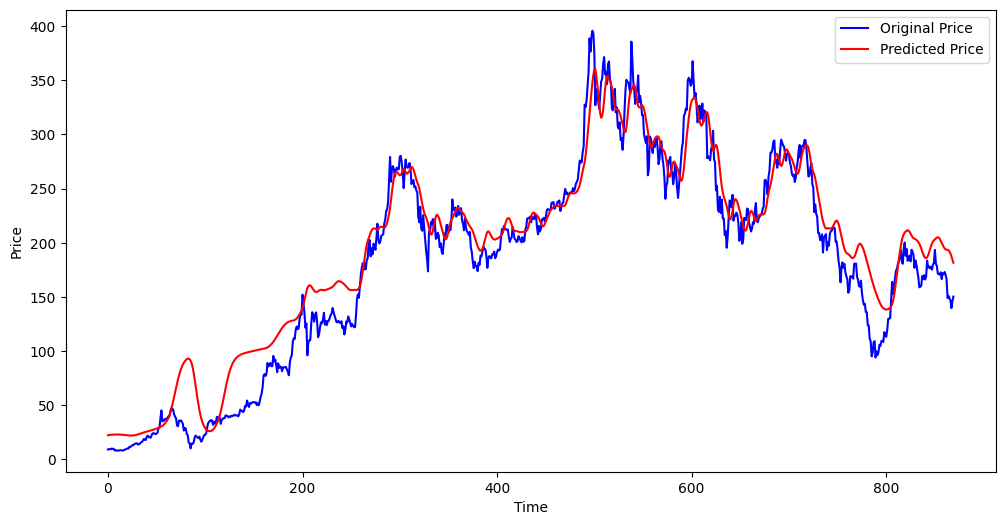

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()